In [1]:
%matplotlib inline
#import seaborn; seaborn.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from keras.callbacks import EarlyStopping

from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
data.drop(['Date','Location','RISK_MM'],axis=1,inplace=True)

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null object
dtypes: float64(16), object(5)
memory

In [6]:
data['WindGustDir'] = data['WindGustDir'].astype('category')
data['WindDir9am'] = data['WindDir9am'].astype('category')
data['WindDir3pm'] = data['WindDir3pm'].astype('category')
data['RainToday'] = data['RainToday'].astype('category')

In [7]:
#data['RainToday'] = [1 if i=='Yes' else 0 for i in data.loc[:,'RainToday']]
data['RainTomorrow'] = [1 if i=='Yes' else 0 for i in data.loc[:,'RainTomorrow']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.33, random_state=42)

In [9]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
119504,13.4,20.2,5.2,1.4,5.9,WNW,50.0,NW,WNW,17.0,20.0,67.0,73.0,1008.5,1006.7,4.0,6.0,18.8,18.7,Yes
82592,21.8,27.7,0.2,3.2,0.2,SSE,41.0,SE,ESE,15.0,11.0,71.0,81.0,1016.9,1015.3,7.0,8.0,26.8,25.2,No
29509,18.4,22.8,14.4,7.0,3.3,NaN,NaN,S,S,24.0,30.0,87.0,70.0,1009.2,1011.7,8.0,7.0,20.9,21.0,Yes
31844,19.7,27.9,0.0,8.0,7.7,NW,61.0,WSW,ESE,28.0,20.0,44.0,30.0,1007.8,1008.3,7.0,1.0,24.1,25.2,No
58355,2.7,18.4,0.2,3.1,NaN,NW,20.0,SE,NNE,6.0,6.0,71.0,56.0,1027.8,1024.2,NaN,1.0,12.0,17.8,No


In [10]:
num_attr = []
cat_attr = []
for i in X_train.columns:
    if X_train[i].dtypes == 'float64':
        num_attr.append(i)
    else:
        cat_attr.append(i)
print(num_attr)
print(cat_attr)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


## Pipeline

In [11]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),('normalizer',Normalizer())])
cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder())])
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attr),('cat',cat_pipeline,cat_attr)])

X_train_transformed = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.transform(X_test)

## Random Forest 

In [12]:
clf =  RandomForestClassifier(n_estimators=100,max_leaf_nodes=16, max_depth=5,class_weight='balanced', random_state=0)
clf.fit(X_train_transformed, y_train) 


y_pred = clf.predict(X_test_tr)
print(cross_val_score(clf, X_test_tr, y_test, cv=3, scoring="accuracy"))
print(confusion_matrix(y_test, y_pred))

[ 0.76300985  0.7635701   0.77175372]
[[28293  8173]
 [ 2722  7736]]


In [90]:
param_grid = {'max_depth':np.arange(5,10),'max_leaf_nodes':np.arange(10,20)}
clf =  RandomForestClassifier(n_estimators=100,max_leaf_nodes=16, max_depth=5,class_weight='balanced', random_state=0)

imp = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc',cv=5)
imp.fit(X_train_transformed,y_train)
print(imp.best_params_)
print(imp.best_score_)

{'max_depth': 9, 'max_leaf_nodes': 19}
0.832310320737


In [91]:
clf =  RandomForestClassifier(n_estimators=100,max_leaf_nodes=19, max_depth=9,class_weight='balanced', random_state=0)
clf.fit(X_train_transformed, y_train) 


y_pred = clf.predict(X_test_tr)
print(cross_val_score(clf, X_test_tr, y_test, cv=5, scoring="accuracy"))
print(confusion_matrix(y_test, y_pred))

[ 0.75559344  0.74704315  0.76078849  0.76982097  0.76108269]
[[27908  8558]
 [ 2817  7641]]


In [ ]:
y_pred = ada_clf.predict(X_test_tr)
confusion_matrix(y_test, y_pred)

In [ ]:
cross_val_score(ada_clf, X_test_tr, y_test, cv=3, scoring="accuracy")

In [ ]:
array([[29557,  6909],
       [ 2513,  7945]], dtype=int64)
array([ 0.79075566,  0.79464229,  0.80046033])

In [ ]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100,max_leaf_nodes=19, max_depth=9,class_weight='balanced',
                                                    random_state=0), n_estimators=80,algorithm="SAMME.R", learning_rate=0.85)
ada_clf.fit(X_train_transformed, y_train)

y_pred = ada_clf.predict(X_test_tr)
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(ada_clf, X_test_tr, y_test, cv=3, scoring="accuracy"))

In [95]:
#[[29327  7139]
# [ 2545  7913]]
#[ 0.79081959  0.79413081  0.80288984]

#[[28762  7704]
# [ 2632  7826]]
#[ 0.77234369  0.77725209  0.78313407]

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86     36466
           1       0.53      0.76      0.62     10458

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.74     46924
weighted avg       0.83      0.79      0.81     46924



## Decision Tree

In [17]:
clf = DecisionTreeClassifier(random_state = 11, class_weight = "balanced",max_depth = 5)
clf.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_tr)
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(clf, X_test_tr, y_test, cv=3, scoring="accuracy"))

param_grid = {'max_depth':np.arange(5,10),'max_leaf_nodes':np.arange(15,20)}

imp = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc',cv=3)
imp.fit(X_train_transformed,y_train)
print(imp.best_params_)
print(imp.best_score_)

[[27820  8646]
 [ 2586  7872]]
[ 0.74747475  0.77514225  0.77475865]
{'max_depth': 7, 'max_leaf_nodes': 19}
0.835610007759


## AdaBoost

In [12]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7,max_leaf_nodes=19,class_weight = 'balanced'), n_estimators=100,algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_transformed, y_train)

y_pred = ada_clf.predict(X_test_tr)
print(confusion_matrix(y_test, y_pred))
print(cross_val_score(ada_clf, X_test_tr, y_test, cv=3, scoring="accuracy"))

[[29687  6779]
 [ 2461  7997]]
[ 0.79280143  0.79719967  0.80423247]


In [ ]:
[[29686  6780]
 [ 2463  7995]]
[ 0.79267357  0.79745541  0.8042964 ]

In [13]:
from joblib import dump, load
dump(ada_clf, 'adaboost1.joblib') 

['adaboost1.joblib']

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.87     36466
           1       0.54      0.76      0.63     10458

    accuracy                           0.80     46924
   macro avg       0.73      0.79      0.75     46924
weighted avg       0.84      0.80      0.81     46924



## ANN

In [102]:


n_cols = X_train_transformed.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from keras.utils import to_categorical
target = to_categorical(y_train)

In [94]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

In [103]:
model.fit(X_train_transformed,target,epochs=100, batch_size=32,class_weight = class_weight)

Epoch 1/100
95269/95269 [==============================] - 15s 153us/step - loss: 0.4461 - acc: 0.7991
Epoch 2/100
95269/95269 [==============================] - 14s 142us/step - loss: 0.3849 - acc: 0.8316
Epoch 3/100
95269/95269 [==============================] - 14s 148us/step - loss: 0.3779 - acc: 0.8357
Epoch 4/100
95269/95269 [==============================] - 14s 143us/step - loss: 0.3742 - acc: 0.8363
Epoch 5/100
95269/95269 [==============================] - 13s 137us/step - loss: 0.3705 - acc: 0.8390
Epoch 6/100
95269/95269 [==============================] - 13s 135us/step - loss: 0.3689 - acc: 0.8392
Epoch 7/100
95269/95269 [==============================] - 13s 139us/step - loss: 0.3674 - acc: 0.8402
Epoch 8/100
95269/95269 [==============================] - 13s 137us/step - loss: 0.3655 - acc: 0.8405
Epoch 9/100
95269/95269 [==============================] - 13s 139us/step - loss: 0.3643 - acc: 0.8421
Epoch 10/100
95269/95269 [==============================] - 13s 140us/ste

In [115]:
model.save('rainTomorrow_2.h5')

In [116]:
prediction = model.predict(X_test_tr)

In [117]:
for i in range(prediction.shape[0]):
    for j in range(prediction.shape[1]):
        if prediction[i][j] > 0.5:
            prediction[i][j] = 1
        else:
            prediction[i][j] = 0

prediction_tr = []
for i in range(prediction.shape[0]):
    if prediction[i,0] == 1:
        prediction_tr.append(0)
    else:
        prediction_tr.append(1)
        
prediction_tr = pd.Series(np.array(prediction_tr))

In [119]:
cfm = confusion_matrix(y_test, prediction_tr)
print(cfm)
print("accuracy:",(cfm[0,0]+cfm[1,1])/(cfm.sum()))
print(classification_report(y_test,prediction_tr))

[[32426  4040]
 [ 4872  5586]]
accuracy: 0.81007586736
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     36466
           1       0.58      0.53      0.56     10458

    accuracy                           0.81     46924
   macro avg       0.72      0.71      0.72     46924
weighted avg       0.80      0.81      0.81     46924



In [51]:
model.save('rainModel.h5')

In [110]:
from keras.models import load_model
my_model = load_model('rainModel.h5')
prediction = my_model.predict(X_test_tr)
for i in range(prediction.shape[0]):
    for j in range(prediction.shape[1]):
        if prediction[i][j] > 0.5:
            prediction[i][j] = 1
        else:
            prediction[i][j] = 0

prediction_tr = []
for i in range(prediction.shape[0]):
    if prediction[i,0] == 1:
        prediction_tr.append(0)
    else:
        prediction_tr.append(1)
        
prediction_tr = pd.Series(np.array(prediction_tr))
cfm = confusion_matrix(y_test, prediction_tr)
print(cfm)
print("accuracy:",(cfm[0,0]+cfm[1,1])/(cfm.sum()))

[[33944  2522]
 [ 5725  4733]]
accuracy: 0.824247719717


In [103]:
from keras.layers import Dense
from keras.models import Sequential

n_cols = X_train_transformed.shape[1]

model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))

model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.utils import to_categorical
target = to_categorical(y_train)
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)
history = model.fit(X_train_transformed,target,epochs=20,validation_split=0.2, batch_size=120,
                   callbacks = [EarlyStopping(patience=3)])

Train on 76215 samples, validate on 19054 samples
Epoch 1/20
76215/76215 [==============================] - 31s 403us/step - loss: 0.4688 - acc: 0.7826 - val_loss: 0.4260 - val_acc: 0.8136
Epoch 2/20
76215/76215 [==============================] - 26s 343us/step - loss: 0.3988 - acc: 0.8244 - val_loss: 0.3831 - val_acc: 0.8355
Epoch 3/20
76215/76215 [==============================] - 26s 337us/step - loss: 0.3801 - acc: 0.8354 - val_loss: 0.3855 - val_acc: 0.8316
Epoch 4/20
76215/76215 [==============================] - 25s 332us/step - loss: 0.3743 - acc: 0.8377 - val_loss: 0.3809 - val_acc: 0.8330
Epoch 5/20
76215/76215 [==============================] - 27s 350us/step - loss: 0.3697 - acc: 0.8391 - val_loss: 0.3742 - val_acc: 0.8365
Epoch 6/20
76215/76215 [==============================] - 26s 344us/step - loss: 0.3662 - acc: 0.8410 - val_loss: 0.3761 - val_acc: 0.8343
Epoch 7/20
76215/76215 [==============================] - 26s 343us/step - loss: 0.3654 - acc: 0.8431 - val_loss: 0.

In [104]:
prediction = model.predict(X_test_tr)

In [105]:
prediction[prediction>=0.5]=1
prediction[prediction<0.5]=0

prediction_tr = []
for i in range(prediction.shape[0]):
    if prediction[i,0] == 1:
        prediction_tr.append(0)
    else:
        prediction_tr.append(1)

prediction_tr = pd.Series(np.array(prediction_tr))

cfm = confusion_matrix(y_test, prediction_tr)
print(cfm)
print("accuracy:",(cfm[0,0]+cfm[1,1])/(cfm.sum()))
print(classification_report(y_test,prediction_tr))

[[34371  2095]
 [ 5530  4928]]
accuracy: 0.837503196658
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     36466
           1       0.70      0.47      0.56     10458

    accuracy                           0.84     46924
   macro avg       0.78      0.71      0.73     46924
weighted avg       0.83      0.84      0.83     46924



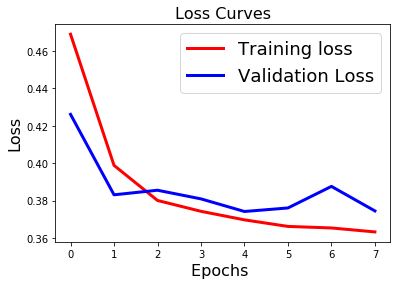

In [106]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
fig1.savefig('loss.png')
plt.show()

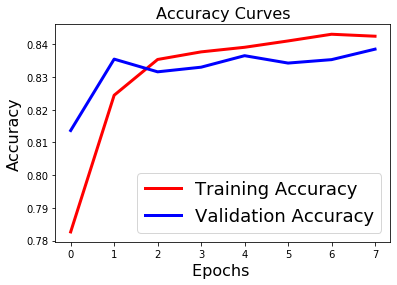

In [107]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
fig2.savefig('accuracy.png')
plt.show()

In [ ]:
[[34371  2095]
 [ 5530  4928]]
accuracy: 0.837503196658
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     36466
           1       0.70      0.47      0.56     10458

    accuracy                           0.84     46924
   macro avg       0.78      0.71      0.73     46924
weighted avg       0.83      0.84      0.83     46924

[[34455  2011]
 [ 5698  4760]]
accuracy: 0.83571306794
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     36466
           1       0.70      0.46      0.55     10458

    accuracy                           0.84     46924
   macro avg       0.78      0.70      0.73     46924
weighted avg       0.82      0.84      0.82     46924


[[34045  2421]
 [ 5355  5103]]
accuracy: 0.834285227176
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     36466
           1       0.68      0.49      0.57     10458

    accuracy                           0.83     46924
   macro avg       0.77      0.71      0.73     46924
weighted avg       0.82      0.83      0.82     46924


[[34347  2119]
 [ 5595  4863]]
accuracy: 0.835606512659
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     36466
           1       0.70      0.47      0.56     10458

    accuracy                           0.84     46924
   macro avg       0.78      0.70      0.73     46924
weighted avg       0.82      0.84      0.82     46924

In [ ]:
[[35128  1338]
 [ 6417  4041]]
accuracy: 0.834732759356

In [33]:
model.save('RainTomorrow_new.h5')

In [ ]:
[[33322  3144]
 [ 4697  5761]]
accuracy: 0.832900008524
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     36466
           1       0.65      0.55      0.60     10458

    accuracy                           0.83     46924
   macro avg       0.76      0.73      0.74     46924
weighted avg       0.83      0.83      0.83     46924

In [14]:
import keras
n_cols = X_train_transformed.shape[1]

In [25]:
early_stopping_monitor = EarlyStopping(patience=3)

def get_new_model(input_shape = n_cols):
    model = Sequential()
    model.add(Dense(250, activation='relu', input_shape = (input_shape,)))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    return(model)
lr_to_test = [0.004,0.005,0.006]
# loop over learning rates
history = []
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    history.append(model.fit(X_train_transformed, target, batch_size=120,validation_split=0.25,
                             class_weight =class_weight, epochs=20,callbacks = [early_stopping_monitor]))
    prediction = model.predict(X_test_tr)
    prediction[prediction>=0.5]=1
    prediction[prediction<0.5]=0

    prediction_tr = []
    for i in range(prediction.shape[0]):
        if prediction[i,0] == 1:
            prediction_tr.append(0)
        else:
            prediction_tr.append(1)

    prediction_tr = pd.Series(np.array(prediction_tr))
    cfm = confusion_matrix(y_test, prediction_tr)
    print("learning rate:",lr)
    print(cfm)
    print("accuracy:",(cfm[0,0]+cfm[1,1])/(cfm.sum()))
    print(classification_report(y_test,prediction_tr))

Train on 71451 samples, validate on 23818 samples
Epoch 1/20
71451/71451 [==============================] - 17s 238us/step - loss: 0.5945 - val_loss: 0.5263
Epoch 2/20
71451/71451 [==============================] - 15s 207us/step - loss: 0.5208 - val_loss: 0.5125
Epoch 3/20
71451/71451 [==============================] - 15s 208us/step - loss: 0.5110 - val_loss: 0.5043
Epoch 4/20
71451/71451 [==============================] - 15s 214us/step - loss: 0.5027 - val_loss: 0.4970
Epoch 5/20
71451/71451 [==============================] - 15s 216us/step - loss: 0.4955 - val_loss: 0.4913
Epoch 6/20
71451/71451 [==============================] - 15s 214us/step - loss: 0.4901 - val_loss: 0.4874
Epoch 7/20
71451/71451 [==============================] - 16s 227us/step - loss: 0.4865 - val_loss: 0.4851
Epoch 8/20
71451/71451 [==============================] - 15s 217us/step - loss: 0.4843 - val_loss: 0.4839
Epoch 9/20
71451/71451 [==============================] - 16s 219us/step - loss: 0.4830 - val_

In [28]:
early_stopping_monitor = EarlyStopping(patience=3)

model = Sequential()
model.add(Dense(200, activation='relu', input_shape = (n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
    
my_optimizer = keras.optimizers.SGD(0.006)
model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
history.append(model.fit(X_train_transformed, target, batch_size=120,validation_split=0.25,
                             class_weight =class_weight, epochs=20,callbacks = [early_stopping_monitor]))
prediction = model.predict(X_test_tr)
prediction[prediction>=0.5]=1
prediction[prediction<0.5]=0

prediction_tr = []

if prediction[i,0] == 1:
    prediction_tr.append(0)
else:
    prediction_tr.append(1)

prediction_tr = pd.Series(np.array(prediction_tr))
cfm = confusion_matrix(y_test, prediction_tr)
print("learning rate:",0.006)
print(cfm)
print("accuracy:",(cfm[0,0]+cfm[1,1])/(cfm.sum()))
print(classification_report(y_test,prediction_tr))

Train on 71451 samples, validate on 23818 samples
Epoch 1/20
71451/71451 [==============================] - 13s 180us/step - loss: 0.5638 - val_loss: 0.5181
Epoch 2/20
71451/71451 [==============================] - 11s 158us/step - loss: 0.5127 - val_loss: 0.5014
Epoch 3/20
71451/71451 [==============================] - 11s 159us/step - loss: 0.4976 - val_loss: 0.4906
Epoch 4/20
71451/71451 [==============================] - 12s 170us/step - loss: 0.4892 - val_loss: 0.4860
Epoch 5/20
71451/71451 [==============================] - 12s 166us/step - loss: 0.4856 - val_loss: 0.4843
Epoch 6/20
71451/71451 [==============================] - 12s 163us/step - loss: 0.4839 - val_loss: 0.4837
Epoch 7/20
71451/71451 [==============================] - 15s 207us/step - loss: 0.4830 - val_loss: 0.4831
Epoch 8/20
71451/71451 [==============================] - 14s 202us/step - loss: 0.4823 - val_loss: 0.4829
Epoch 9/20
71451/71451 [==============================] - 15s 206us/step - loss: 0.4819 - val_

ValueError: Found input variables with inconsistent numbers of samples: [46924, 1]

In [21]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)